In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# declaring the batch size = 20
batch_size = 20
iris = tfds.load('iris', split = 'train[:90%]')
np.arange(10, 100).reshape(9,10).astype(np.float32)

array([[10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69.],
       [70., 71., 72., 73., 74., 75., 76., 77., 78., 79.],
       [80., 81., 82., 83., 84., 85., 86., 87., 88., 89.],
       [90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]], dtype=float32)

In [71]:
x = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(x)

In [72]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [73]:
dataset = dataset.batch(7, drop_remainder = True)

In [74]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)


In [75]:
dataset = dataset.shuffle(buffer_size = 5, seed = 42).batch(7)

In [76]:
for items in dataset:
    print(items)

tf.Tensor([[0 1 2 3 4 5 6]], shape=(1, 7), dtype=int32)


In [80]:
iris_train = tfds.load('iris', split = 'train[:90%]')
iris_test  = tfds.load('iris', split = 'train[:10%]')

In [81]:
train_features = iris_train

In [84]:
dataset = tfds.load('mnist')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\zobekenobe\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [85]:
mnist_train, mnist_test = dataset['train'], dataset['test']

In [89]:
mnist_train = mnist_train.shuffle(10000)
for item in mnist_train:
    images = item['image']
    labels = item['label']

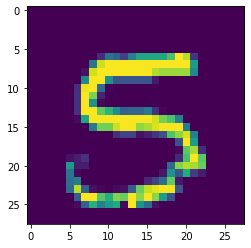

In [93]:
plt.imshow(images)
plt.show()

In [95]:
labels.numpy()

5

In [133]:
iris = tfds.load('iris', split = 'train[60%:]')

In [138]:
def iris2d(features, label):
    return features[2:], tf.cast((labels == 0), dtype = tf.float32)

In [144]:
train_generator = (iris.map(iris['features'],iris['label']).shuffle(buffer_size = 100).batch(20))

TypeError: 'PrefetchDataset' object is not subscriptable

In [115]:
for sample in iris:
    print(sample['features'][2:].numpy(), tf.cast(sample['label'] == 0, dtype = 'int32').numpy())

[5.8 1.6] 0
[4.3 1.3] 0
[1.4 0.2] 1
[4.1 1.3] 0
[5. 2.] 0
[4.5 1.5] 0
[1.7 0.5] 1
[4.  1.3] 0
[4.7 1.6] 0
[5.1 1.5] 0
[5.6 2.4] 0
[5.5 1.8] 0
[1.5 0.2] 1
[6.7 2.2] 0
[3.5 1. ] 0
[6.1 2.5] 0
[4.5 1.5] 0
[1.4 0.2] 1
[4.2 1.5] 0
[1.6 0.2] 1
[6.  2.5] 0
[5.6 2.2] 0
[1.9 0.2] 1
[5.8 1.8] 0
[1.9 0.4] 1
[4.2 1.3] 0
[5.3 1.9] 0
[1.7 0.2] 1
[5.5 2.1] 0
[4.9 1.5] 0
[1.3 0.2] 1
[1.5 0.1] 1
[6.9 2.3] 0
[1.5 0.2] 1
[5.1 1.6] 0
[5.7 2.5] 0
[1.6 0.6] 1
[5.3 2.3] 0
[6.1 1.9] 0
[5.4 2.1] 0
[4.8 1.8] 0
[4.  1.3] 0
[4.5 1.5] 0
[1.3 0.2] 1
[3.3 1. ] 0
[4.4 1.4] 0
[4.7 1.4] 0
[4.8 1.8] 0
[1.6 0.2] 1
[5.1 1.8] 0
[4.5 1.6] 0
[6.  1.8] 0
[4.  1.2] 0
[1.3 0.2] 1
[5.4 2.3] 0
[1.6 0.2] 1
[3.3 1. ] 0
[5.6 2.4] 0
[3.8 1.1] 0
[1.5 0.1] 1


In [145]:
def squareIt(x):
    return x**2

In [157]:
def iris2d(features, label):
    return features[2:], tf.cast((label == 0), dtype = tf.float32)

In [154]:
list(map(squareIt, [1,2,3,4]))

[1, 4, 9, 16]

In [149]:
import tensorflow_datasets as tfds

In [151]:
iris = tfds.load('iris', split = 'train[:90%]')

In [161]:
image_generator = (iris.map(iris2d).shuffle(buffer_size = 100).batch(20))

TypeError: in user code:


    TypeError: tf__iris2d() missing 1 required positional argument: 'label'


In [181]:
d = {'a':1, 'b':2, 'c':3}

In [267]:
def readme(dic):
    for k in dic.keys():
        print(k)

In [268]:
def readme2(**dic):
    print (dic['a'], dic['b'],dic['c'])

In [269]:
readme2(a=1, b=2, c=3)

1 2 3


In [270]:
readme(d)

a
b
c


In [276]:
list(map(readme, {'a':1, 'b':2, 'c':3}))

AttributeError: 'str' object has no attribute 'keys'

In [262]:
import tensorflow_datasets as tfds
iris = tfds.load('iris', split='train[:90%]', as_supervised=True)
iris_test = tfds.load('iris', split='train[90%:]', as_supervised=True)



In [297]:
for item in iris:
    print(item[0].numpy()[2:], tf.cast(item[1].numpy()== 0, dtype = tf.float32).numpy())

[1.5 0.2] 1.0
[6.1 2.3] 0.0
[4.5 1.3] 0.0
[5.9 2.3] 0.0
[1.4 0.2] 1.0
[3.6 1.3] 0.0
[4.4 1.2] 0.0
[3.7 1. ] 0.0
[1.4 0.3] 1.0
[6.7 2. ] 0.0
[4.7 1.4] 0.0
[1.4 0.2] 1.0
[5.2 2. ] 0.0
[1.4 0.2] 1.0
[1.3 0.4] 1.0
[1.3 0.3] 1.0
[1.5 0.3] 1.0
[1.4 0.1] 1.0
[5.8 2.2] 0.0
[6.6 2.1] 0.0
[5.7 2.1] 0.0
[6.4 2. ] 0.0
[5.2 2.3] 0.0
[1.2 0.2] 1.0
[5.  1.9] 0.0
[1.6 0.2] 1.0
[5.1 2.3] 0.0
[4.6 1.4] 0.0
[4.1 1. ] 0.0
[3.9 1.4] 0.0
[5.  1.7] 0.0
[3.5 1. ] 0.0
[5.1 2.4] 0.0
[5.1 2. ] 0.0
[1.7 0.3] 1.0
[1.7 0.4] 1.0
[1.5 0.2] 1.0
[1.5 0.1] 1.0
[4.2 1.3] 0.0
[1.6 0.4] 1.0
[1.5 0.2] 1.0
[4.6 1.3] 0.0
[1.3 0.2] 1.0
[4.4 1.4] 0.0
[1.1 0.1] 1.0
[5.5 1.8] 0.0
[1.2 0.2] 1.0
[1.5 0.4] 1.0
[4. 1.] 0.0
[5.6 1.4] 0.0
[4.4 1.3] 0.0
[1.5 0.1] 1.0
[1.4 0.2] 1.0
[4.8 1.4] 0.0
[1.5 0.4] 1.0
[4.7 1.2] 0.0
[4.1 1.3] 0.0
[4.3 1.3] 0.0
[5.6 2.1] 0.0
[1.5 0.4] 1.0
[1.4 0.3] 1.0
[4.5 1.5] 0.0
[4.8 1.8] 0.0
[1.4 0.2] 1.0
[1.6 0.2] 1.0
[4.5 1.5] 0.0
[5.7 2.3] 0.0
[5.1 1.9] 0.0
[4.  1.3] 0.0
[4.9 1.8] 0.0
[5.1 1.9] 0.0
[4.9 1.8

In [211]:


batch_size = 20



In [212]:


def iris2d(features, label):
    return features[2:], tf.cast((label == 0), dtype=tf.float32)

train_generator = (iris
                   .map(iris2d)
                   .shuffle(buffer_size=100)
                   .batch(batch_size)
                  )

test_generator = iris_test.map(iris2d).batch(1)



In [298]:
for i in range(100):
    idx = np.random.choice(100)
    x_ = x[idx]
    y_ = y[idx]

InvalidArgumentError: slice index 37 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/